In [1]:
import os, sys, array
import numpy as np

import ROOT
# ROOT.gROOT.SetStyle("ATLAS")

## local
from hpana.samples import Higgs
from hpana.variables import CLF_FEATURES
from hpana.plotting.plot import create_canvas, ratio_hist, label_plot

Welcome to JupyROOT 6.14/08


INFO:db:Loading cross sections from /project/6024950/sbahrase/HPlusTauNu/hpana/hpana/db/xsec/xsec.pkl ...


In [29]:
PATH = "/project/6024950/sbahrase/HPlusTauNu/hpana/workAREAAA/PLOTTING/v06Final/"
VARS = CLF_FEATURES["taujet"]["HIGH"]
OUTDIR = "plots_signal_weights_20052019"
SR_REGION =  "SR_TAULEP"

tf = ROOT.TFile(PATH+"v06Htj_1518_sigs_corrMCweight_20052019/HISTS_taujet_2019_05_21.root")
tf = ROOT.TFile(PATH+"v06Htl_1518_sigs_corrMCweight_20052019/HISTS_taulep_2019_05_21.root")

nd = tf.GetDirectory("NOMINAL")
# nd.ls()
HNAME = "Hplus{0}_category_SR_TAULEP_var_{1}"

h_uw h_cw
10211.0 9150.0921936
h_uw h_cw
10211.0 8434.35169411
h_uw h_cw
10211.0 13736.5809183
Hplus200UNWEIGHTED_category_SR_TAULEP_var_bjet_0_pt Hplus200WEIGHTED_category_SR_TAULEP_var_bjet_0_pt
10211.0 10205.3586848
Hplus200UNWEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi Hplus200WEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi
10211.0 10211.0
Hplus200UNWEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr Hplus200WEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr
10211.0 10211.0001812
h_uw h_cw
10211.0 10200.3755379
h_uw h_cw
10741.0 9900.01242065
h_uw h_cw
10741.0 10621.4878845
h_uw h_cw
10741.0 10263.0174847
Hplus225UNWEIGHTED_category_SR_TAULEP_var_bjet_0_pt Hplus225WEIGHTED_category_SR_TAULEP_var_bjet_0_pt
10741.0 10741.4806932
Hplus225UNWEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi Hplus225WEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi
10741.0 10740.999939
Hplus225UNWEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr Hplus225WEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr
10741.0 10741.

Hplus1600UNWEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr Hplus1600WEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr
10467.0 10467.0000303
h_uw h_cw
10467.0 10415.6919327
h_uw h_cw
10118.0 14537.1176738
h_uw h_cw
10118.0 10193.9666939
h_uw h_cw
10118.0 9943.73007965
Hplus1800UNWEIGHTED_category_SR_TAULEP_var_bjet_0_pt Hplus1800WEIGHTED_category_SR_TAULEP_var_bjet_0_pt
10118.0 10145.8267512
Hplus1800UNWEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi Hplus1800WEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi
10118.0 10117.9998169
Hplus1800UNWEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr Hplus1800WEIGHTED_category_SR_TAULEP_var_bjet_0_tau_0_dr
10118.0 10118.00001
h_uw h_cw
10118.0 10054.3126755
h_uw h_cw
9799.0 7121.97021121
h_uw h_cw
9799.0 9663.6935482
h_uw h_cw
9799.0 9462.17905426
Hplus2000UNWEIGHTED_category_SR_TAULEP_var_bjet_0_pt Hplus2000WEIGHTED_category_SR_TAULEP_var_bjet_0_pt
9799.0 9773.45170832
Hplus2000UNWEIGHTED_category_SR_TAULEP_var_bjet_0_met_dphi Hplus2000WEIGHTED_category

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots_signal_weights_20052019/Hplus200_weighted_vs_unweighted_SR_TAULEP_tau_0_met_dphi.png has been created
Info in <TCanvas::Print>: pdf file plots_signal_weights_20052019/Hplus200_weighted_vs_unweighted_SR_TAULEP_tau_0_met_dphi.pdf has been created
Info in <TCanvas::Print>: eps file plots_signal_weights_20052019/Hplus200_weighted_vs_unweighted_SR_TAULEP_tau_0_met_dphi.eps has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of

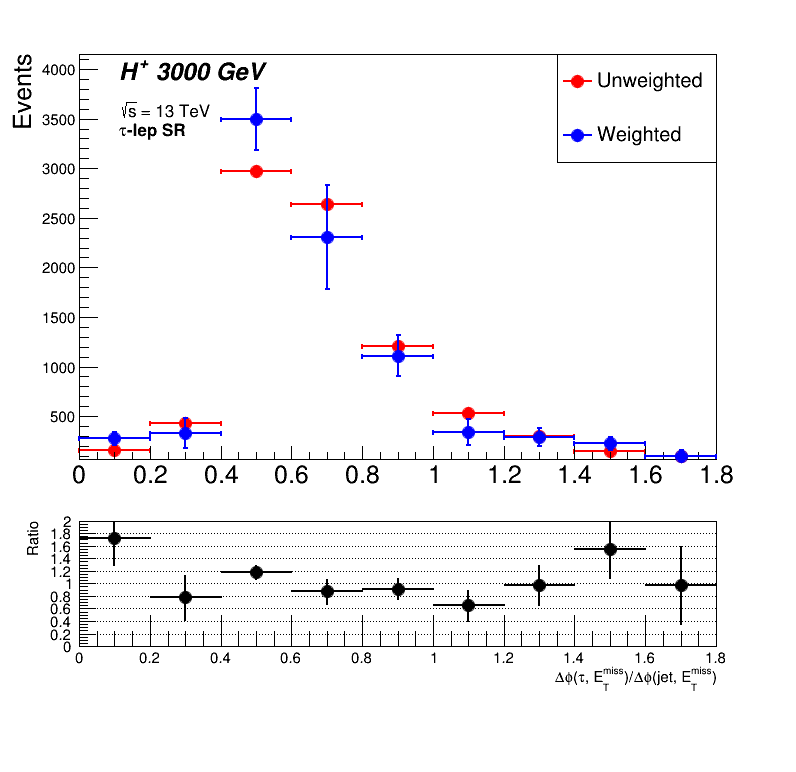

In [30]:
## prep output
os.system("mkdir -p %s"%OUTDIR)

for m in Higgs.MASSES[:]:
    if m < 200:
        continue
    m = str(m)
    for var in VARS[:]:
        fig, main_pad, ratio_pad = create_canvas(show_ratio=True)
        labels = label_plot(fig, 
                            category="#tau-lep SR", data_info="#sqrt{s} = 13 TeV", atlas_label="H^{+} %s GeV"%m)
        leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)

        ## unweighted 
        h_uw = nd.Get(HNAME.format(m+"UNWEIGHTED", var.name))

        ## corrected weight
        h_cw = nd.Get(HNAME.format(m+"WEIGHTED", var.name))

        ## rebinning 
        if var.plot_bins is not None:
            if isinstance(var.plot_bins, dict):
                if SR_REGION in var.plot_bins:
                    bins = var.plot_bins[SR_REGION]
                else:
                    bins = var.plot_bins["COMMON"]
            else:
                bins = var.plot_bins

            h_cw = h_cw.Rebin(len(bins)-1, "h_cw", array.array("d", bins))
            h_uw = h_uw.Rebin(len(bins)-1, "h_uw", array.array("d", bins))

        for h in [h_uw, h_cw]:
            h.SetMarkerSize(1.5)
            h.SetLineWidth(2)

        h_cw.Sumw2()
        h_uw.Sumw2()
        h_cw.Scale(h_uw.Integral()/h_cw.Integral())

        rh = ratio_hist(h_cw, h_uw)
        h_uw.GetYaxis().SetTitleOffset(0.9)
        h_uw.GetYaxis().SetLabelSize(0.03)        
        h_uw.GetYaxis().SetTitle("Events")
        mn = h_uw.GetMinimum()
        mx = h_uw.GetMaximum()
        h_uw.GetYaxis().SetRangeUser(0.7*mn, 1.4*mx)

        h_uw.SetLineColor(ROOT.kRed)
        h_uw.SetMarkerColor(ROOT.kRed)
        leg.AddEntry(h_uw, "Unweighted", "LP")
        
        h_cw.SetLineColor(ROOT.kBlue)
        h_cw.SetMarkerColor(ROOT.kBlue)
        leg.AddEntry(h_cw, "Weighted", "LP")

        print h_uw.GetName(), h_cw.GetName() 
        print h_uw.Integral(0, -1), h_cw.Integral(0, -1)

        main_pad.cd()
        h_uw.SetTitle("")
        h_uw.Draw("E1LP")
        h_cw.Draw("SAME E1LP")
        leg.Draw("SAME")
        for lb in labels:
            lb.Draw("SAME")
        
        rh.SetLineColor(ROOT.kBlack)
        rh.SetMarkerColor(ROOT.kBlack)
        
        rh.GetXaxis().SetTitle(var.title)
        rh.GetYaxis().SetTitle("Ratio")
        rh.GetYaxis().SetRangeUser(0., 2.)

        ratio_pad.cd()        
        rh.SetTitle("")
        rh.Draw()
        for fmt in [".png", ".pdf", ".eps"]:
            fig.Print(
                "%s/Hplus%s_weighted_vs_unweighted_%s_%s"%(OUTDIR, m, SR_REGION, var.name)+fmt)
        fig.Draw()
        

tau_0_pt 2278.86715889 -312.296073437
lep_0_pt 2570.78138107 -515.965376526
bjet_0_pt 2569.67239058 -515.713782787
met_et 558.310855865 -356.980636567
tau_0_met_dphi 791.069252014 319.055021286
lep_0_met_dphi 2570.7820282 -516.95262146
bjet_0_met_dphi 2570.7815094 -516.952728271
tau_0_lep_0_dr 2570.78184307 -516.952751935
bjet_0_lep_0_dr 2570.7817533 -516.952604771
met_jet_dphi_ratio 2565.78803444 -513.506617546
tau_0_pt 3132.3968029 -1657.94701672
lep_0_pt 3436.81919968 -1828.66673377
bjet_0_pt 3434.79637349 -1827.53123808
met_et 850.859134197 -440.287820756
tau_0_met_dphi 934.180618286 -466.960430145
lep_0_met_dphi 3438.7255249 -1829.59079742
bjet_0_met_dphi 3438.72556305 -1829.59065628
tau_0_lep_0_dr 3438.72549909 -1829.59070998
bjet_0_lep_0_dr 3438.72573841 -1829.5905118
met_jet_dphi_ratio 3429.81363487 -1820.48528528
tau_0_pt 3564.18711853 -2120.67413712
lep_0_pt 3869.23071599 -2277.21618402
bjet_0_pt 3868.59113848 -2276.1674574
met_et 1122.77030182 -793.752224565
tau_0_met_dphi 9

bjet_0_met_dphi 10678.7044067 -6451.837677
tau_0_lep_0_dr 10678.7033927 -6451.83798182
bjet_0_lep_0_dr 10678.7026711 -6451.83833408
met_jet_dphi_ratio 10454.8538513 -6340.17910767


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots_signal_weights_20052019/Hplus200_Positive_vs_Negative_weights_SR_TAULEP_tau_0_pt.png has been created
Info in <TCanvas::Print>: pdf file plots_signal_weights_20052019/Hplus200_Positive_vs_Negative_weights_SR_TAULEP_tau_0_pt.pdf has been created
Info in <TCanvas::Print>: eps file plots_signal_weights_20052019/Hplus200_Positive_vs_Negative_weights_SR_TAULEP_tau_0_pt.eps has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file plots_signal_weights_20052019/Hplus200_Positive_vs_Negative_weights_SR_TAULEP_lep_0_pt

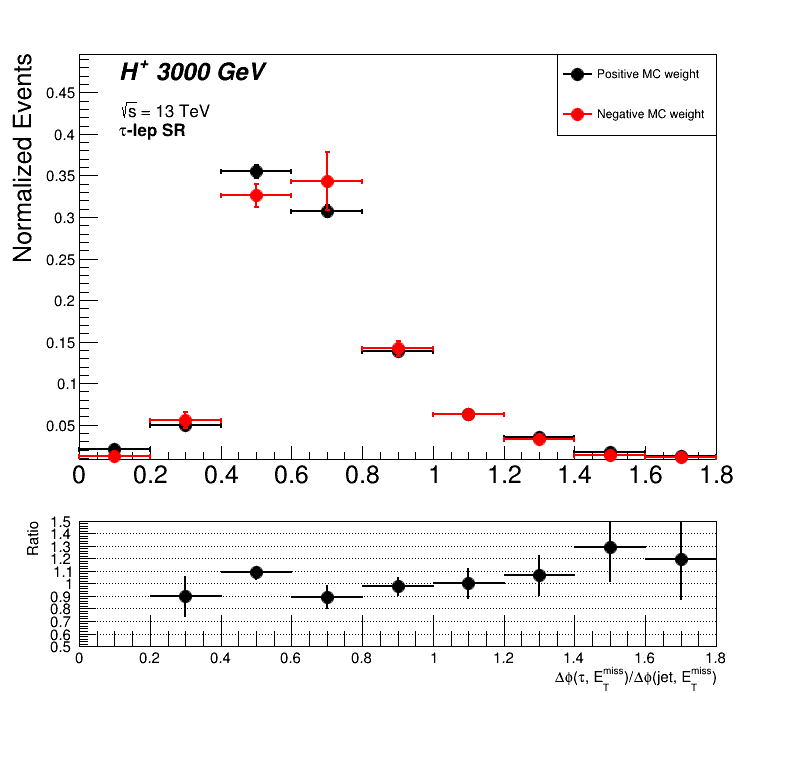

In [36]:
#### negative vs positive weights
tf_n = ROOT.TFile(PATH+"v06Htj_1518_sigs_negativeMCweight_20052019/HISTS_taujet_2019_05_21.root")
tf_p = ROOT.TFile(PATH+"v06Htj_1518_sigs_positiveMCweight_20052019/HISTS_taujet_2019_05_21.root")

tf_n = ROOT.TFile(PATH+"v06Htl_1518_sigs_negativeMCweight_20052019/HISTS_taulep_2019_05_21.root")
tf_p = ROOT.TFile(PATH+"v06Htl_1518_sigs_positiveMCweight_20052019/HISTS_taulep_2019_05_21.root")

nd_n = tf_n.GetDirectory("NOMINAL")
nd_p = tf_p.GetDirectory("NOMINAL")

VARS = CLF_FEATURES["taulep"]["HIGH"]
SR_REGION = "SR_TAULEP"
HNAME = "Hplus{0}_category_SR_TAULEP_var_{1}"

## prep output
os.system("mkdir -p %s"%OUTDIR)

for m in Higgs.MASSES[:]:
    if m < 200:
        continue        
    m = str(m)
    for var in VARS[:]:
        fig, main_pad, ratio_pad = create_canvas(show_ratio=True)
        labels = label_plot(fig, 
                            category="#tau-lep SR", data_info="#sqrt{s} = 13 TeV", atlas_label="H^{+} %s GeV"%m)

        ## positive weight
        hn = nd_n.Get(HNAME.format(m, var.name))

        ## negative weight
        hp = nd_p.Get(HNAME.format(m, var.name))

        ## rebinning 
        if var.plot_bins is not None:
            if isinstance(var.plot_bins, dict):
                if SR_REGION in var.plot_bins:
                    bins = var.plot_bins[SR_REGION]
                else:
                    bins = var.plot_bins["COMMON"]
            else:
                bins = var.plot_bins
            hp = hp.Rebin(len(bins)-1, "hp", array.array("d", bins))
            hn = hn.Rebin(len(bins)-1, "hn", array.array("d", bins))
        
        print var.name, hp.Integral(), hn.Integral()
        for h in [hp, hn]:
            h.SetMarkerSize(1.5)
            h.SetLineWidth(2)
            intg = h.Integral()
            if intg==0:
                continue
            h.Scale(1./intg)
            
        rh = ratio_hist(hp, hn)
            
        leg = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)
        
        hp.SetLineColor(ROOT.kBlack)
        hp.SetMarkerColor(ROOT.kBlack)
        hp.GetYaxis().SetTitleOffset(0.9)
        hp.GetYaxis().SetLabelSize(0.03)        
        hp.GetYaxis().SetTitle("Events")
        leg.AddEntry(hp, "Positive MC weight", "LP")
        
        hn.SetLineColor(ROOT.kRed)
        hn.SetMarkerColor(ROOT.kRed)
        leg.AddEntry(hn, "Negative MC weight", "LP")
        
        hp.GetYaxis().SetTitle("Normalized Events")
        mn = hp.GetMinimum()
        mx = hp.GetMaximum()
        hp.GetYaxis().SetRangeUser(0.7*mn, 1.4*mx)
        
        main_pad.cd()
        hp.SetTitle("")
        hp.Draw("E1")
        hn.Draw("SAME E1")
        leg.Draw("SAME")
        for lb in labels:
            lb.Draw("SAME")
        main_pad.Draw()
        
        ratio_pad.cd()
        rh.GetXaxis().SetTitle(var.title)
        rh.GetYaxis().SetTitle("Ratio")
        
        rh.GetYaxis().SetRangeUser(0.5, 1.5)
        rh.SetTitle("")
        rh.Draw()
        for fmt in [".png", ".pdf", ".eps"]:
            fig.Print(
                "%s/Hplus%s_Positive_vs_Negative_weights_%s_%s"%(OUTDIR, m, SR_REGION, var.name)+fmt)
        fig.Draw()
#         fig.Clear()
        